In [30]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [31]:
# define the feature names:
feat_names=['age','bp','sg','al','su','rbc','pc',
'pcc','ba','bgr','bu','sc','sod','pot','hemo',
'pcv','wbcc','rbcc','htn','dm','cad','appet','pe',
'ane','classk']
feat_cat=np.array(['num','num','cat','cat','cat','cat','cat','cat','cat',
         'num','num','num','num','num','num','num','num','num',
         'cat','cat','cat','cat','cat','cat','cat'])

In [32]:
#import the dataframe:

#xx=pd.read_csv("./Chronic_Kidney_Disease/chronic_kidney_disease.arff",sep=',',
 #              skiprows=29,names=feat_names,
  #             header=None,na_values=['?','\t?'],
   #            warn_bad_lines=True)
xx=pd.read_csv("./python/date/chronic_kidney_disease_v2.arff",sep=',',
    skiprows=29,names=feat_names,
    header=None,na_values=['?','\t?'],)

In [33]:
Np,Nf=xx.shape

In [34]:
target_names = ['notckd','ckd']# for the final plots
mapping={
    'normal':0,
    'abnormal':1,
    'present':1,
    'notpresent':0,
    'yes':1,
    ' yes':1,
    'no':0,
    '\tno':0,
    '\tyes':1,
    'ckd':1,
    'notckd':0,
    'poor':1,
    'good':0,
    'ckd\t':1}
xx=xx.replace(mapping.keys(),mapping.values())


In [35]:
print('cardinality of each feature:')
print(xx.nunique())# show the cardinality of each feature in the dataset; in particular classk should have only two possible values

cardinality of each feature:
age        76
bp         10
sg          5
al          6
su          6
rbc         2
pc          2
pcc         2
ba          2
bgr       146
bu        118
sc         84
sod        34
pot        40
hemo      115
pcv        42
wbcc       89
rbcc       45
htn         2
dm          2
cad         2
appet       2
pe          2
ane         2
classk      2
dtype: int64


In [36]:
miss_values = xx.isnull().sum(axis=1)
for k in range(miss_values.max()+1):
    print(k,np.sum(miss_values==k))

0 158
1 45
2 33
3 37
4 31
5 33
6 12
7 20
8 8
9 12
10 4
11 7


In [37]:
print(xx.info())
x=xx.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [38]:
# drop rows with less than 19=Nf-6 recorded features:
x=x.dropna(thresh=19)
x.reset_index(drop=True, inplace=True)# necessary to have index without "jumps"
n=x.isnull().sum(axis=1)# check the number of missing values in each row
print('Number of points in the original dataset: ',xx.shape[0])
print('reduced dataset: at least 19 values per row')
print('number of points in the reduced dataset: ',x.shape[0])
print('max number of missing values in the reduced dataset: ',n.max())

Number of points in the original dataset:  400
reduced dataset: at least 19 values per row
number of points in the reduced dataset:  349
max number of missing values in the reduced dataset:  6


In [39]:
# take the rows with exctly Nf=25 useful features; this is going to be the training dataset
# for regression
Xtrain=x.dropna(thresh=25)
Xtrain.reset_index(drop=True, inplace=True)# reset the index of the dataframe
print('Number of points in the training dataset: ',Xtrain.shape[0])

Number of points in the training dataset:  158


In [40]:
mm=Xtrain.mean(axis=0)
ss=Xtrain.std(axis=0)
Xtrain_norm=(Xtrain-mm)/ss
#%% normalize the entire dataset using the coeffs found for the training dataset
X_norm=(x-mm)/ss
Np,Nf=X_norm.shape

In [41]:
#%% run linear regression using least squares on all the missing data
for kk in range(Np):
    xrow=X_norm.iloc[kk]#k-th row
    mask=xrow.isna()# columns with nan in row k
    Data_tr_norm=Xtrain_norm.loc[:,~mask]# remove the columns from the training dataset
    y_tr_norm=Xtrain_norm.loc[:,mask]# columns to be regressed
    w1=np.linalg.inv(np.dot(Data_tr_norm.T,Data_tr_norm))
    w=np.dot(np.dot(w1,Data_tr_norm.T),y_tr_norm)# weight vector
    ytest_norm=np.dot(X_norm.loc[kk,~mask],w)
    X_norm.iloc[kk][mask]=ytest_norm # substitute nan with regressed values
x_new=X_norm*ss+mm # denormalize

/var/folders/r5/tmz4tmxn6s5f_cnt2d3y0pv00000gn/T/ipykernel_46646/1440578129.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_norm.iloc[kk][mask]=ytest_norm # substitute nan with regressed values
/var/folders/r5/tmz4tmxn6s5f_cnt2d3y0pv00000gn/T/ipykernel_46646/1440578129.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_norm.iloc[kk][mask]=ytest_norm # substitute nan with regressed values
/var/folders/r5/tmz4tmxn6s5f_cnt2d3y0pv00000gn/T/ipykernel_46646/1440578129.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [42]:
#%% manage categorical features
# get the possible values (i.e. alphabet) for the categorical features
alphabets=[]
for k in range(len(feat_cat)):
    if feat_cat[k]=='cat':
        val=Xtrain[Xtrain.columns[k]].unique()
        alphabets.append(np.sort(val))
    else:
        alphabets.append('num')
index=np.argwhere(feat_cat=='cat').flatten()
for k in index:
    val=alphabets[k].flatten()
    c=x_new[x_new.columns[k]].values
    val = val.reshape(1,-1) # force row vector
    c=c.reshape(-1,1) # force column vector
    d=(val-c)**2 # find the square distances
    ii=d.argmin(axis=1) # find the closest categorical value
    cc=val[0,ii] # cc contains only the categorical values
    x_new[x_new.columns[k]]=cc
print(x_new.nunique())
print(x_new.describe().T)

age        73
bp          9
sg          5
al          5
su          6
rbc         2
pc          2
pcc         2
ba          2
bgr       136
bu        107
sc         75
sod        33
pot        40
hemo      112
pcv        41
wbcc       89
rbcc       45
htn         2
dm          2
cad         2
appet       2
pe          2
ane         2
classk      2
dtype: int64
        count         mean          std       min      25%      50%       75%  \
age     343.0    50.781341    16.938537     3.000    41.00    53.00    63.500   
bp      341.0    76.041056    13.736536    50.000    70.00    80.00    80.000   
sg      349.0     1.017063     0.006197     1.005     1.01     1.02     1.020   
al      349.0     0.945559     1.328258     0.000     0.00     0.00     2.000   
su      349.0     0.424069     1.079109     0.000     0.00     0.00     0.000   
rbc     349.0     0.123209     0.329149     0.000     0.00     0.00     0.000   
pc      349.0     0.203438     0.403134     0.000     0.00     0.00   

In [43]:
#%% check the distributions
L=x_new.shape[0]
plotCDF=False # change to True if you want the plots
if plotCDF:
    for k in range(Nf):
        plt.figure()
        a=xx[xx.columns[k]].dropna()
        M=a.shape[0]
        plt.plot(np.sort(a),np.arange(M)/M,label='original dataset')
        plt.plot(np.sort(x_new[x_new.columns[k]]),np.arange(L)/L,label='regressed dataset')
        plt.title('CDF of '+xx.columns[k])
        plt.xlabel('x')
        plt.ylabel('P(X<=x)')
        plt.grid()
        plt.legend(loc='upper left')

In [44]:
#%%------------------ Decision trees -------------------
# Let us use only the complete data (no missing values)
target = Xtrain.classk
inform = Xtrain.drop('classk', axis=1)
clfXtrain = tree.DecisionTreeClassifier(criterion='entropy',random_state=4)
clfXtrain = clfXtrain.fit(inform,target)
test_pred = clfXtrain.predict(x_new.drop('classk', axis=1))

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('Performance of the decision tree based on the training dataset only:')
print('accuracy =', accuracy_score(x_new.classk,test_pred))
print(confusion_matrix(x_new.classk,test_pred))

Performance of the decision tree based on the training dataset only:
accuracy = 0.9197707736389685
[[150   0]
 [ 28 171]]


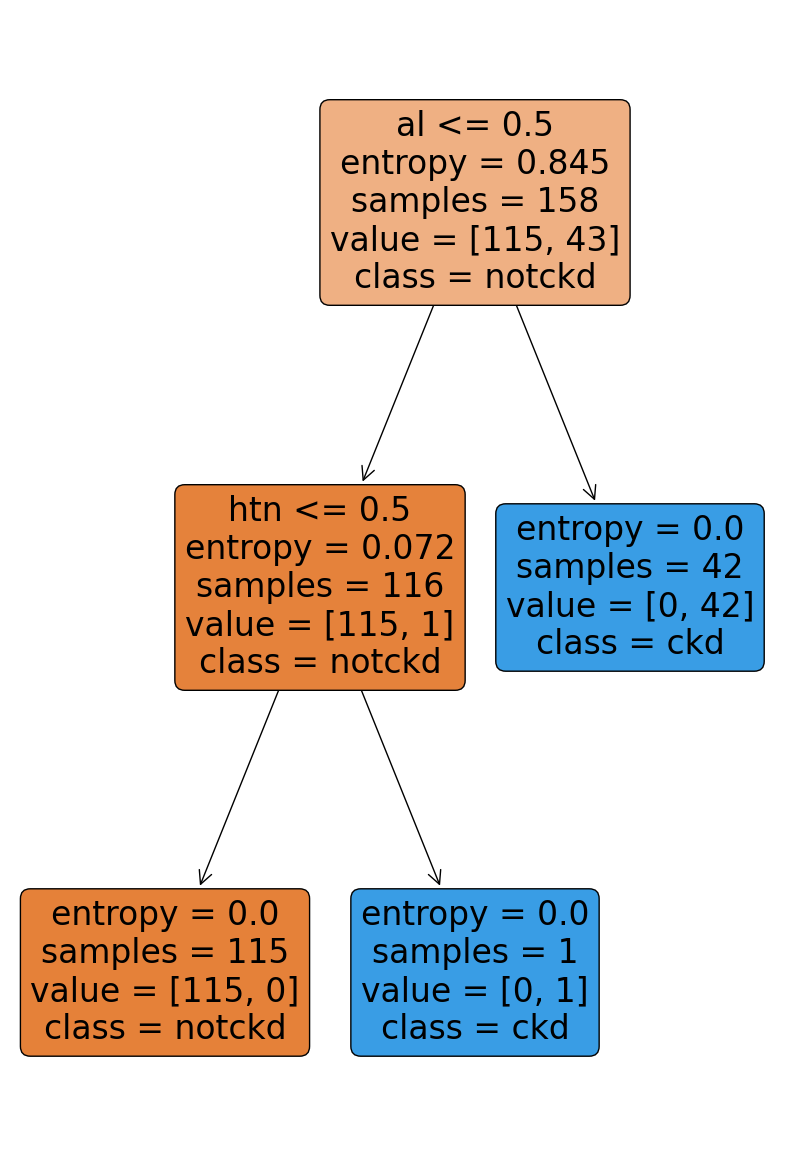

In [46]:
plt.figure(figsize=(10,15))
tree.plot_tree(clfXtrain,feature_names=feat_names[:24],
               class_names=target_names,rounded=True,
               proportion =False ,filled = True )
plt.savefig('fig_training.png' )

In [47]:
median_values = Xtrain.median()

#Substitute missing values in x with the median values
y_new = x.copy()  # Create a copy of x to store the new dataset

for column in x.columns:
    # For numeric columns, replace missing values with the median of the respective feature
    if x[column].dtype != 'object':
        median_val = median_values[column]
        y_new[column].fillna(median_val, inplace=True)

# Ensure y_new has the same number of rows (400 rows)
y_new = y_new.head(400)

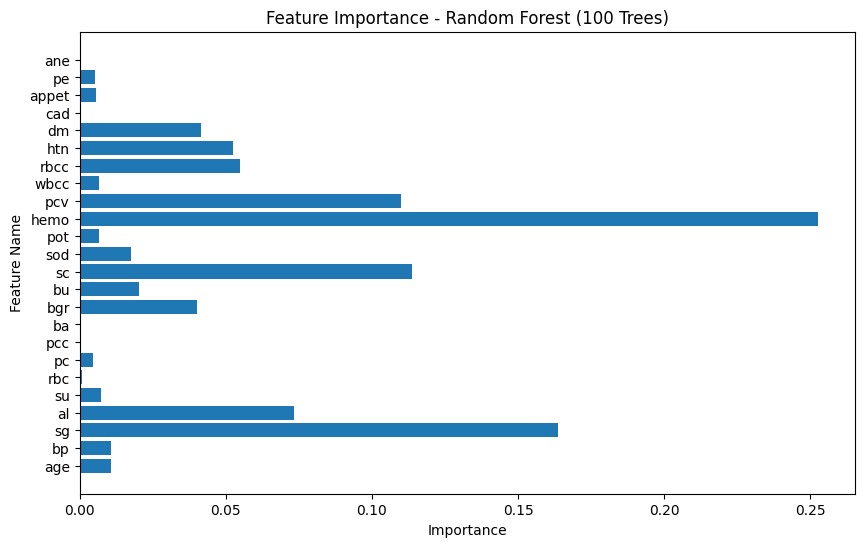

Accuracy: 0.994269340974212


In [51]:
# from sklearn.ensemble import RandomForestClassifier

# # Create a Random Forest classifier with 100 trees
# rf_100 = RandomForestClassifier(n_estimators=100)

# # Train the model on x_new and y_new
# rf_100.fit(x_new.drop('classk', axis=1), x_new['classk'])

# # Predict using the trained model
# predictions_100 = rf_100.predict(y_new.drop('classk', axis=1))

# # Get accuracy and confusion matrix for 100 trees
# accuracy_100 = accuracy_score(y_new['classk'], predictions_100)
# confusion_matrix_100 = confusion_matrix(y_new['classk'], predictions_100)

# # Feature Importance for 100 trees
# importances_100 = rf_100.feature_importances_
# plt.figure(figsize=(10, 6))
# plt.barh(x_new.columns[:-1], importances_100)
# plt.xlabel('Importance')
# plt.ylabel('Feature Name')
# plt.title('Feature Importance - Random Forest (100 Trees)')
# plt.show()
# print(accuracy_100)

#previous code is up to here


from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer  # Import imputer from scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Assuming x_new and y_new are your datasets

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
x_new_imputed = pd.DataFrame(imputer.fit_transform(x_new.drop('classk', axis=1)), columns=x_new.columns[:-1])
y_new_imputed = pd.DataFrame(imputer.transform(y_new.drop('classk', axis=1)), columns=y_new.columns[:-1])

# Create a Random Forest classifier with 100 trees
rf_100 = RandomForestClassifier(n_estimators=100)

# Train the model on x_new_imputed and y_new_imputed
rf_100.fit(x_new_imputed, x_new['classk'])

# Predict using the trained model
predictions_100 = rf_100.predict(y_new_imputed)

# Get accuracy and confusion matrix for 100 trees
accuracy_100 = accuracy_score(y_new['classk'], predictions_100)
confusion_matrix_100 = confusion_matrix(y_new['classk'], predictions_100)

# Feature Importance for 100 trees
importances_100 = rf_100.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(x_new.columns[:-1], importances_100)
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance - Random Forest (100 Trees)')
plt.show()
print("Accuracy:", accuracy_100)


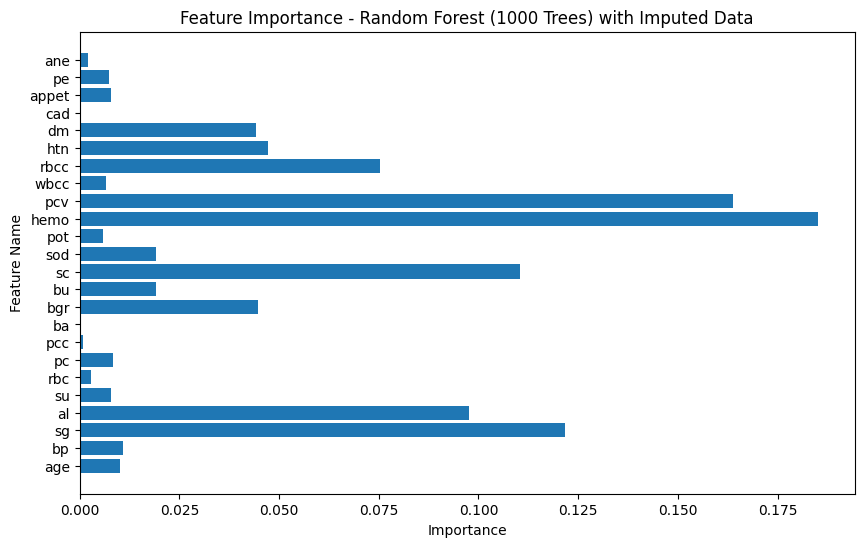

0.994269340974212


In [53]:
# # Create a Random Forest classifier with 1000 trees
# rf_1000 = RandomForestClassifier(n_estimators=1000)

# # Train the model on x_new and y_new
# rf_1000.fit(x_new.drop('classk', axis=1), x_new['classk'])

# # Predict using the trained model
# predictions_1000 = rf_1000.predict(y_new.drop('classk', axis=1))

# # Get accuracy and confusion matrix for 1000 trees
# accuracy_1000 = accuracy_score(y_new['classk'], predictions_1000)
# confusion_matrix_1000 = confusion_matrix(y_new['classk'], predictions_1000)

# # Feature Importance for 1000 trees
# importances_1000 = rf_1000.feature_importances_
# plt.figure(figsize=(10, 6))
# plt.barh(x_new.columns[:-1], importances_1000)
# plt.xlabel('Importance')
# plt.ylabel('Feature Name')
# plt.title('Feature Importance - Random Forest (1000 Trees)')
# plt.show()
# print(accuracy_1000)

# Previous code is up to here

from sklearn.impute import SimpleImputer

# Create a SimpleImputer instance
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'

# Fit the imputer on your training data and transform both x_new and y_new
x_new_imputed = imputer.fit_transform(x_new.drop('classk', axis=1))
y_new_imputed = imputer.transform(y_new.drop('classk', axis=1))

# Now, train and predict using the imputed data
rf_1000.fit(x_new_imputed, x_new['classk'])
predictions_1000_imputed = rf_1000.predict(y_new_imputed)

# Get accuracy and confusion matrix for 1000 trees
accuracy_1000_imputed = accuracy_score(y_new['classk'], predictions_1000_imputed)
confusion_matrix_1000_imputed = confusion_matrix(y_new['classk'], predictions_1000_imputed)

# Feature Importance for 1000 trees
importances_1000_imputed = rf_1000.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(x_new.columns[:-1], importances_1000_imputed)
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance - Random Forest (1000 Trees) with Imputed Data')
plt.show()

print(accuracy_1000_imputed)


In [54]:
from sklearn.model_selection import train_test_split

# Split y_new into training and test subsets (50%)
y_train, y_test = train_test_split(y_new, test_size=0.5, shuffle=True)

# Random Forest Classifier with 1000 trees on the training dataset
rf_1000 = RandomForestClassifier(n_estimators=1000)
rf_1000.fit(y_train.drop('classk', axis=1), y_train['classk'])
predictions_rf_1000 = rf_1000.predict(y_test.drop('classk', axis=1))

# Accuracy and Confusion Matrix for Random Forest (1000 trees) on test dataset
accuracy_rf_1000 = accuracy_score(y_test['classk'], predictions_rf_1000)
confusion_matrix_rf_1000 = confusion_matrix(y_test['classk'], predictions_rf_1000)

# CART Decision Tree Classifier on the training dataset
clf_cart = tree.DecisionTreeClassifier(criterion='entropy')
clf_cart.fit(y_train.drop('classk', axis=1), y_train['classk'])
predictions_cart = clf_cart.predict(y_test.drop('classk', axis=1))

# Accuracy and Confusion Matrix for CART Decision Tree on test dataset
accuracy_cart = accuracy_score(y_test['classk'], predictions_cart)
confusion_matrix_cart = confusion_matrix(y_test['classk'], predictions_cart)

In [55]:
print(accuracy_cart)
print(confusion_matrix_cart)

0.9657142857142857
[[75  0]
 [ 6 94]]
